In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [777]:
#Importing the dataframe
df1 = pd.read_csv("ren_energy2.csv", header = None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,Years,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,United States,"323,6","335,7","298,1","270,8",326,"352,9","351,3","319,6","349,7",...,"552,5","562,3","631,2","714,5","741,1","769,1","830,5",871,"968,6","973,7"
2,Canada,"305,3","312,5","318,5","309,9","293,9","299,6","311,3","319,7","327,1",...,"407,2",422,"431,8","440,8","433,7",429,"436,6","435,9","452,3","421,2"
3,France,"63,6","64,1","72,2","78,3","48,5","55,8","59,7","71,1","66,9",...,"92,6","90,3","97,1","90,9","111,4","111,1","123,2","119,7",111,"139,8"
4,Germany,19,"20,2","21,8","21,7",20,"18,8","17,5","20,5","21,2",...,"161,9","188,1","189,1","215,7","222,9","241,2","251,1","233,9","254,6","272,4"


In [619]:
# Transposing the dataframe and getting only years after 1995
df = df1.T
df.columns = df.iloc[0]
df = df[11:]
df

,Years,United States,Canada,France,Germany,United Kingdom,India,Japan,Russia,Italy,China
11,1995,"378,2","341,3","75,5","25,1","6,7",77,"93,1","176,3","41,5","194,2"
12,1996,"416,2","362,2","68,5",23,"5,7","70,7","92,5","154,4","46,2","189,6"
13,1997,"425,6","356,9","66,5","24,2","7,2","72,2",103,"157,5","46,2","198,9"
14,1998,"391,3","339,9","64,8","26,2","8,6",86,"105,4","158,6","46,5","201,7"
15,1999,"388,1","354,1","75,4","29,2","9,6","85,4","100,5","160,6","51,3","199,6"
16,2000,"345,5",366,"69,4","37,8","9,9","80,3",101,"164,2","50,9","225,6"
17,2001,"284,5","341,5","77,7",39,"9,5","76,2","98,3",174,"54,3","280,7"
18,2002,341,"359,7","64,2","46,1","11,1","72,8","98,6","162,4","48,3","291,4"
19,2003,"353,2","346,3","63,1","46,7","10,7","74,6","112,1",156,"46,9","287,3"
20,2004,"349,5","349,2","63,9",58,"14,2","109,2","112,4","176,1","53,9","357,4"


In [621]:
# Converting all the values to floats
for i in df.columns:
    df[i] = df[i].str.replace(',', '.').astype(float)

1995.0


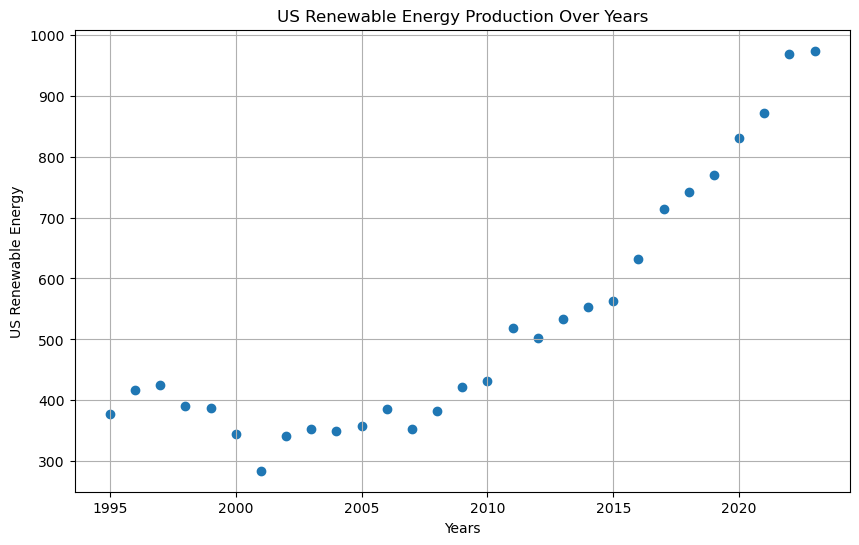

In [779]:
# Plotting the renewable energy production in the US
x = df["Years"]
df2 = df[["Years", "United States"]]

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Years'], df2['United States'])
plt.xlabel('Years')
plt.ylabel('US Renewable Energy')
plt.title('US Renewable Energy Production Over Years')
plt.grid(True)

# Set x-ticks to include only every 10 years

xticks = list(range(1995, 2025, 5))
plt.xticks(xticks)

plt.show()

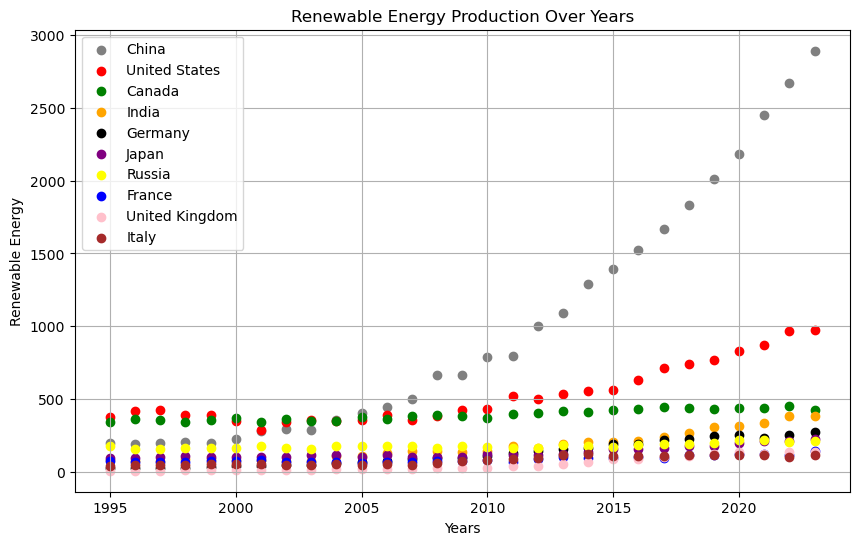

In [834]:
# Plotting the renewable energy of all countries on one graph
x = df["Years"]
counter = 0
colors = ["gray", "red", "green", "orange", "black", "purple", "yellow", "blue", "pink", "brown"]
plt.figure(figsize=(10, 6))
columns = ["China", "United States", "Canada", "India", "Germany", "Japan", "Russia", "France", "United Kingdom", "Italy"]

for i in columns:
    y = df[i]
    df2 = df[["Years", i]]
    
    # Generate the scatter plot
    plt.scatter(df['Years'], df2[i], color=colors[counter], label=i)
    counter += 1

# Set x-ticks to include only every 10 years
xticks = list(range(1995, 2025, 5))
plt.xticks(xticks)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Renewable Energy')
plt.title('Renewable Energy Production Over Years')
plt.grid(True)
plt.legend()  # Add legend to differentiate between the countries

# Show the plot
plt.show()


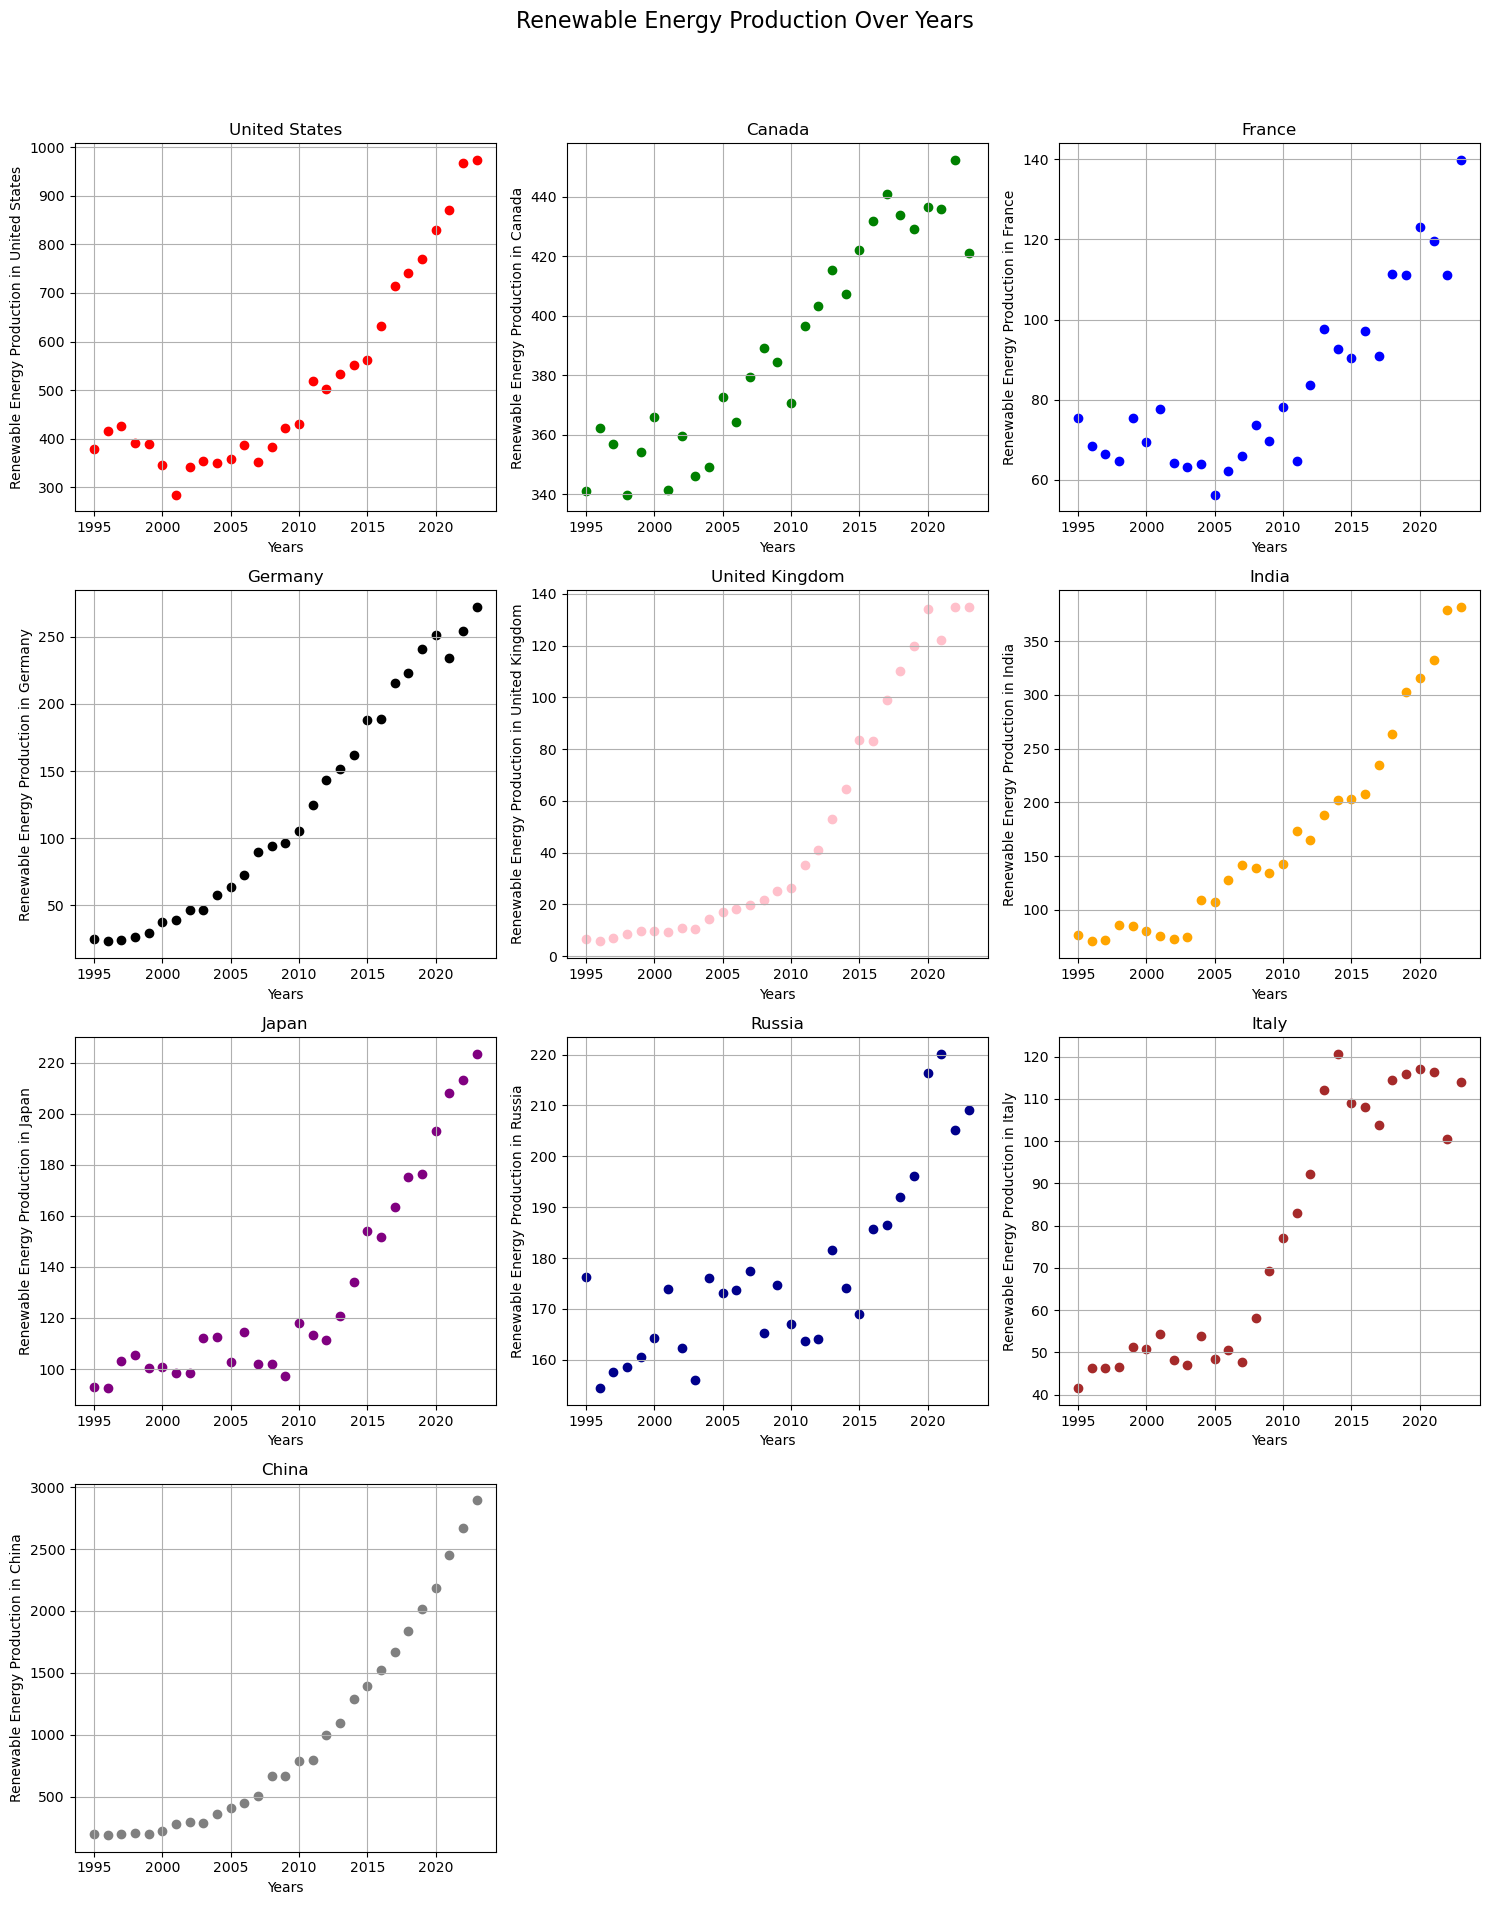

In [633]:
# Plot the renewable energy production of each country seperatly

# Set up the subplots
num_cols = 3
num_rows = (len(df.columns) - 1 + num_cols - 1) // num_cols  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

x = df["Years"]
colors = ["red", "green", "blue", "black", "pink", "orange", "purple", "darkblue", "brown", "gray"]
counter = 0

for i, ax in zip(df.columns[1:], axes.flatten()):
    y = df[i]
    df2 = df[["Years", i]]
    # Convert the column to numeric, replacing commas with dots and then converting to float
    #df2[i] = df2[i].str.replace(',', '.').astype(float)
    
    # Generate the scatter plot
    ax.scatter(df['Years'], df2[i], color=colors[counter])
    ax.set_title(i)
    counter += 1

    # Set x-ticks to include only every 10 years
    xticks = list(range(1995, 2025, 5))

    ax.set_xticks(xticks)
    ax.set_xlabel("Years")
    ax.set_ylabel("Renewable Energy Production in " + i)
    ax.grid(True)

# Remove empty subplots
for j in range(counter, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Add overall labels and title
fig.suptitle('Renewable Energy Production Over Years', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Index(['Years', 'United States', 'Canada', 'France', 'Germany',
       'United Kingdom', 'India', 'Japan', 'Russia', 'Italy', 'China'],
      dtype='object', name=0)


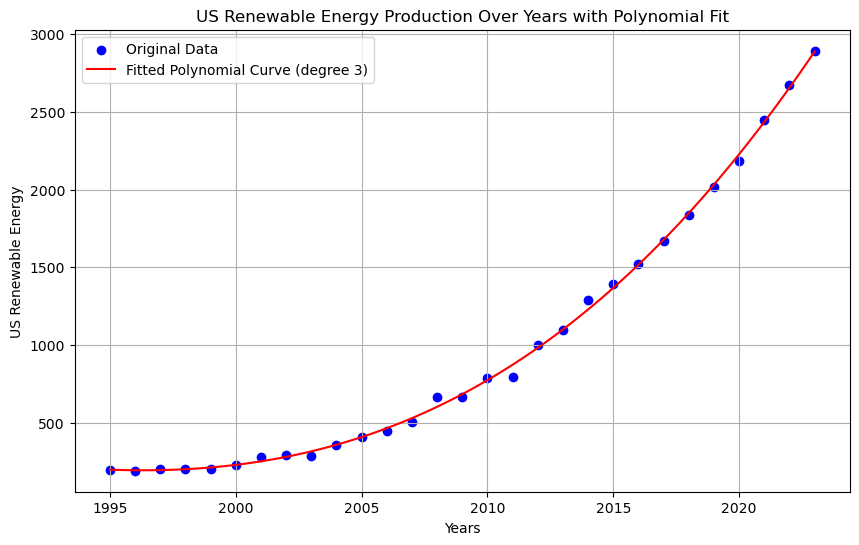

In [635]:
# Fitting a polynomial curve onto the China Data

# Prepare the data
print(df.columns)
x_data = df['Years'].values.reshape(-1, 1)
y_data = df["China"].values

# Transform the data to include polynomial features
degree = 3 # You can adjust the degree to fit your data better
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x_data)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y_data)

# Generate the fitted polynomial curve
x_fit = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
x_poly_fit = poly.transform(x_fit)
y_fit = model.predict(x_poly_fit)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data', color='blue')

# Plot the fitted polynomial curve
plt.plot(x_fit, y_fit, label=f'Fitted Polynomial Curve (degree {degree})', color='red')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('US Renewable Energy')
plt.title('US Renewable Energy Production Over Years with Polynomial Fit')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

[1066.30290086]
[456.92714833]
[140.43191023]
[301.81866447]
[165.20514504]
[404.19627804]
[234.85599342]
[218.93711001]
[130.87991242]
[3055.99999986]


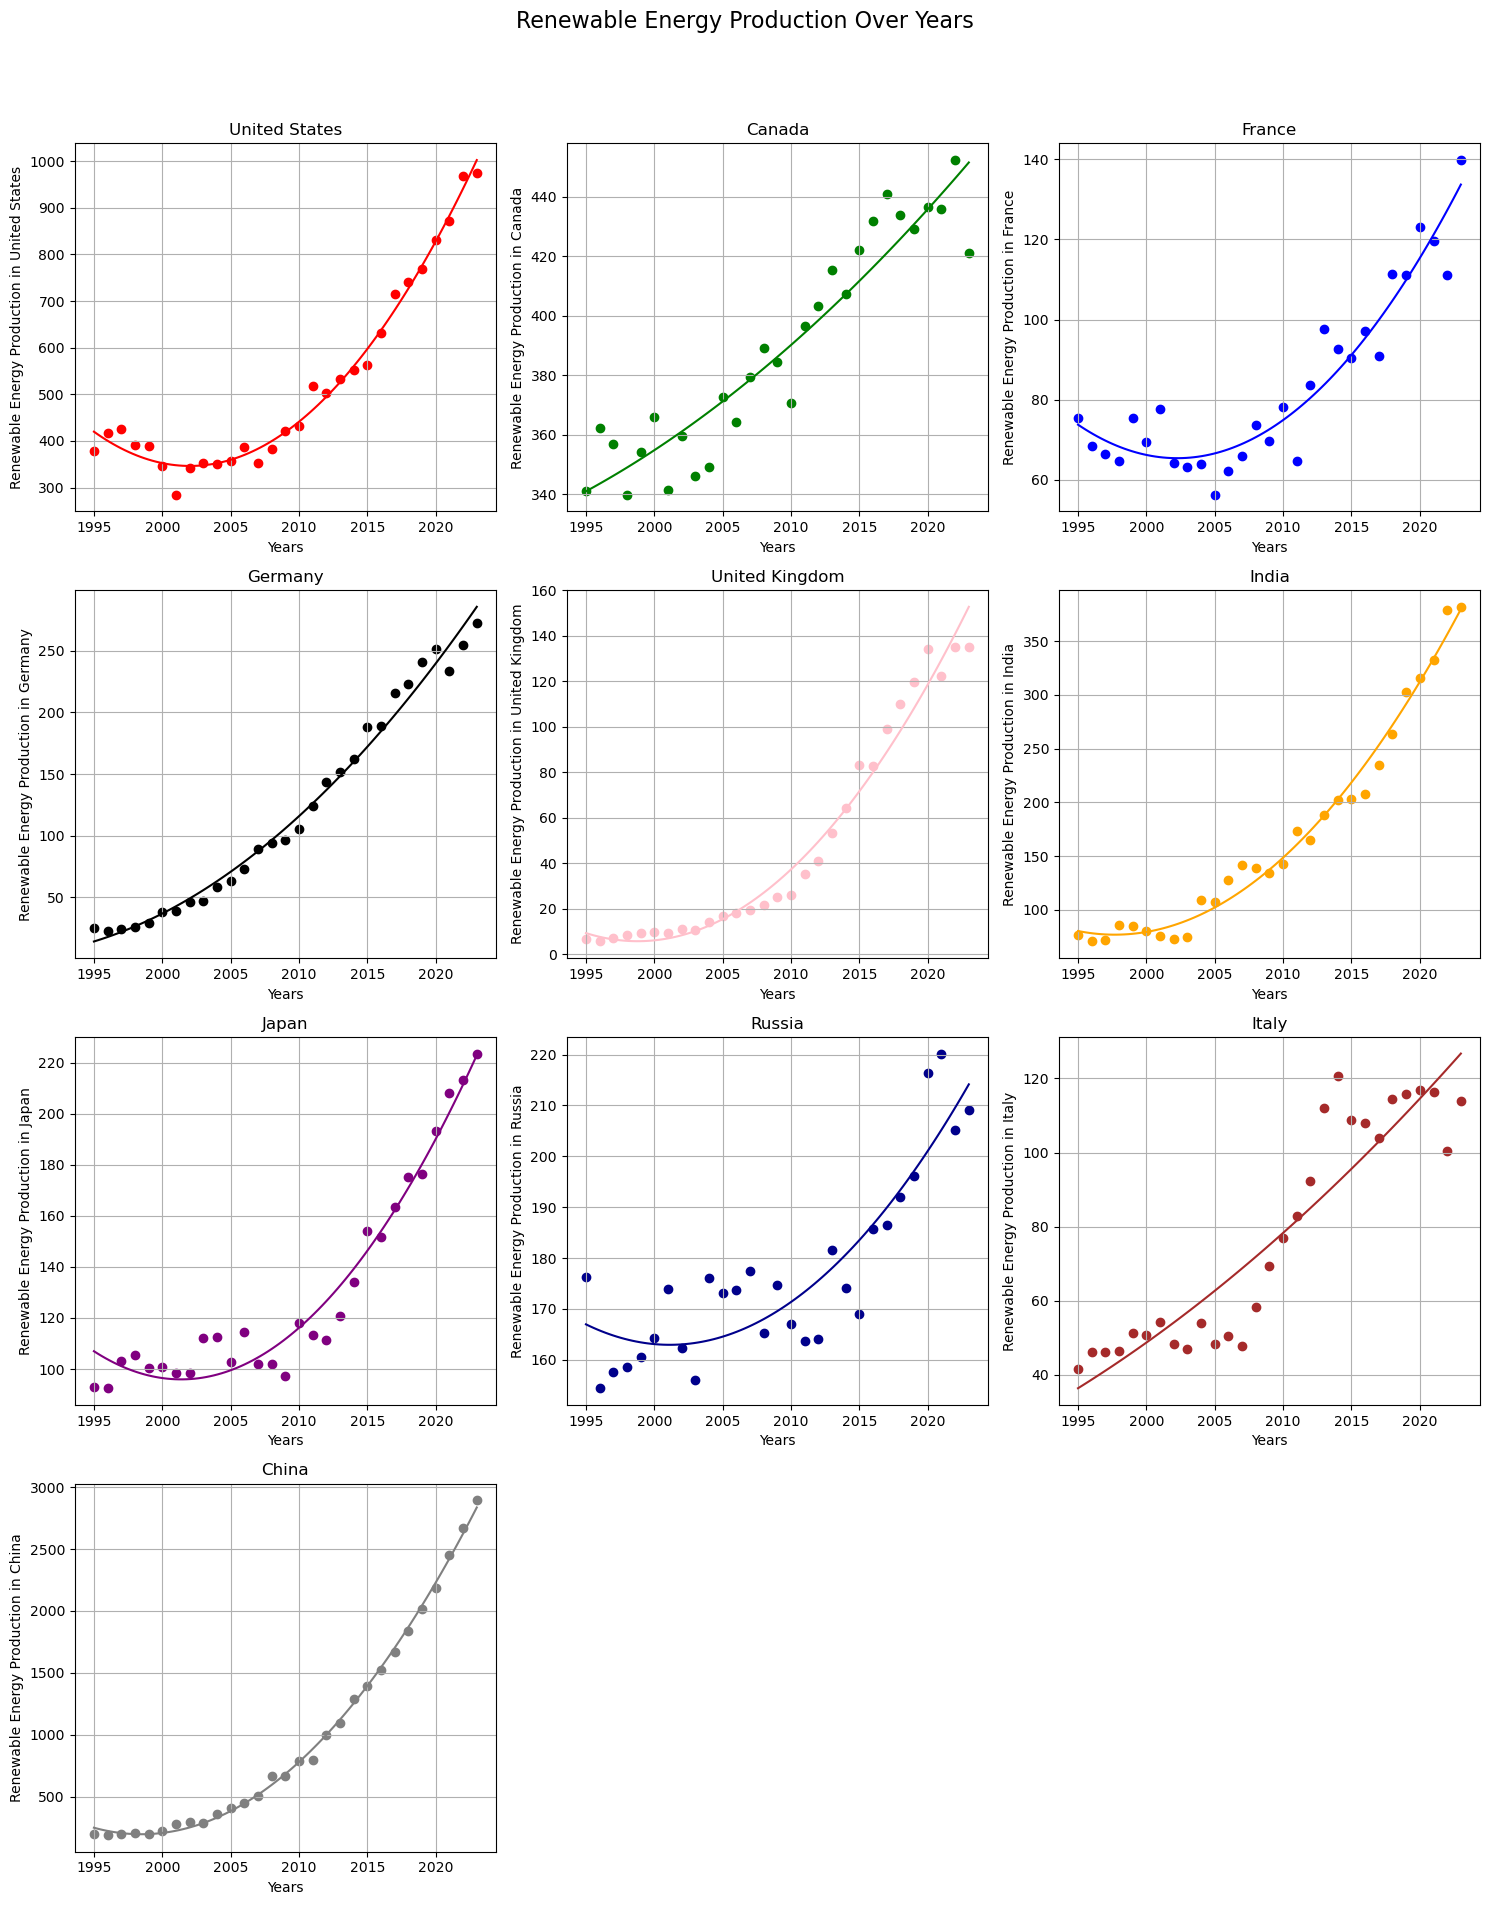

In [830]:
# Fitting a polynomial curve of degree two onto the polynomial data

# Set up the subplots
num_cols = 3
num_rows = (len(df.columns) - 1 + num_cols - 1) // num_cols  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

x = df["Years"]
colors = ["red", "green", "blue", "black", "pink", "orange", "purple", "darkblue", "brown", "gray"]
counter = 0
x_data = df['Years'].values.reshape(-1, 1)
degree = 2
for i, ax in zip(df.columns[1:], axes.flatten()):
    y_data = df[i].values
    
    # Transform the data to include polynomial features
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x_data)
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(x_poly, y_data)
    
    # Generate the fitted polynomial curve
    x_fit = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
    x_poly_fit = poly.transform(x_fit)
    y_fit = model.predict(x_poly_fit)

    # Predict the value for the year 2030
    year_2030 = np.array([[2024]])
    year_2030_poly = poly.transform(year_2030)
    us_2030_pred = model.predict(year_2030_poly)
    print(us_2030_pred)


    # Generate the scatter plot
    ax.scatter(x_data, y_data, label='Original Data', color=colors[counter])
    ax.plot(x_fit, y_fit, label=f'Fitted Polynomial Curve (degree {degree})', color=colors[counter])
    ax.set_title(i)
    counter += 1

    # Set x-ticks to include only every 10 years
    xticks = list(range(1995, 2025, 5))

    ax.set_xticks(xticks)
    ax.set_xlabel("Years")
    ax.set_ylabel("Renewable Energy Production in " + i)
    ax.grid(True)

# Remove empty subplots
for j in range(counter, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Add overall labels and title
fig.suptitle('Renewable Energy Production Over Years', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [787]:
# Read the population data for each country
population = pd.read_csv("All_Population_Data.csv")

In [791]:
# Convert all columns to floats
for i in population.columns[1:]:
    population[i] = population[i].str.replace(',', '').astype(float)

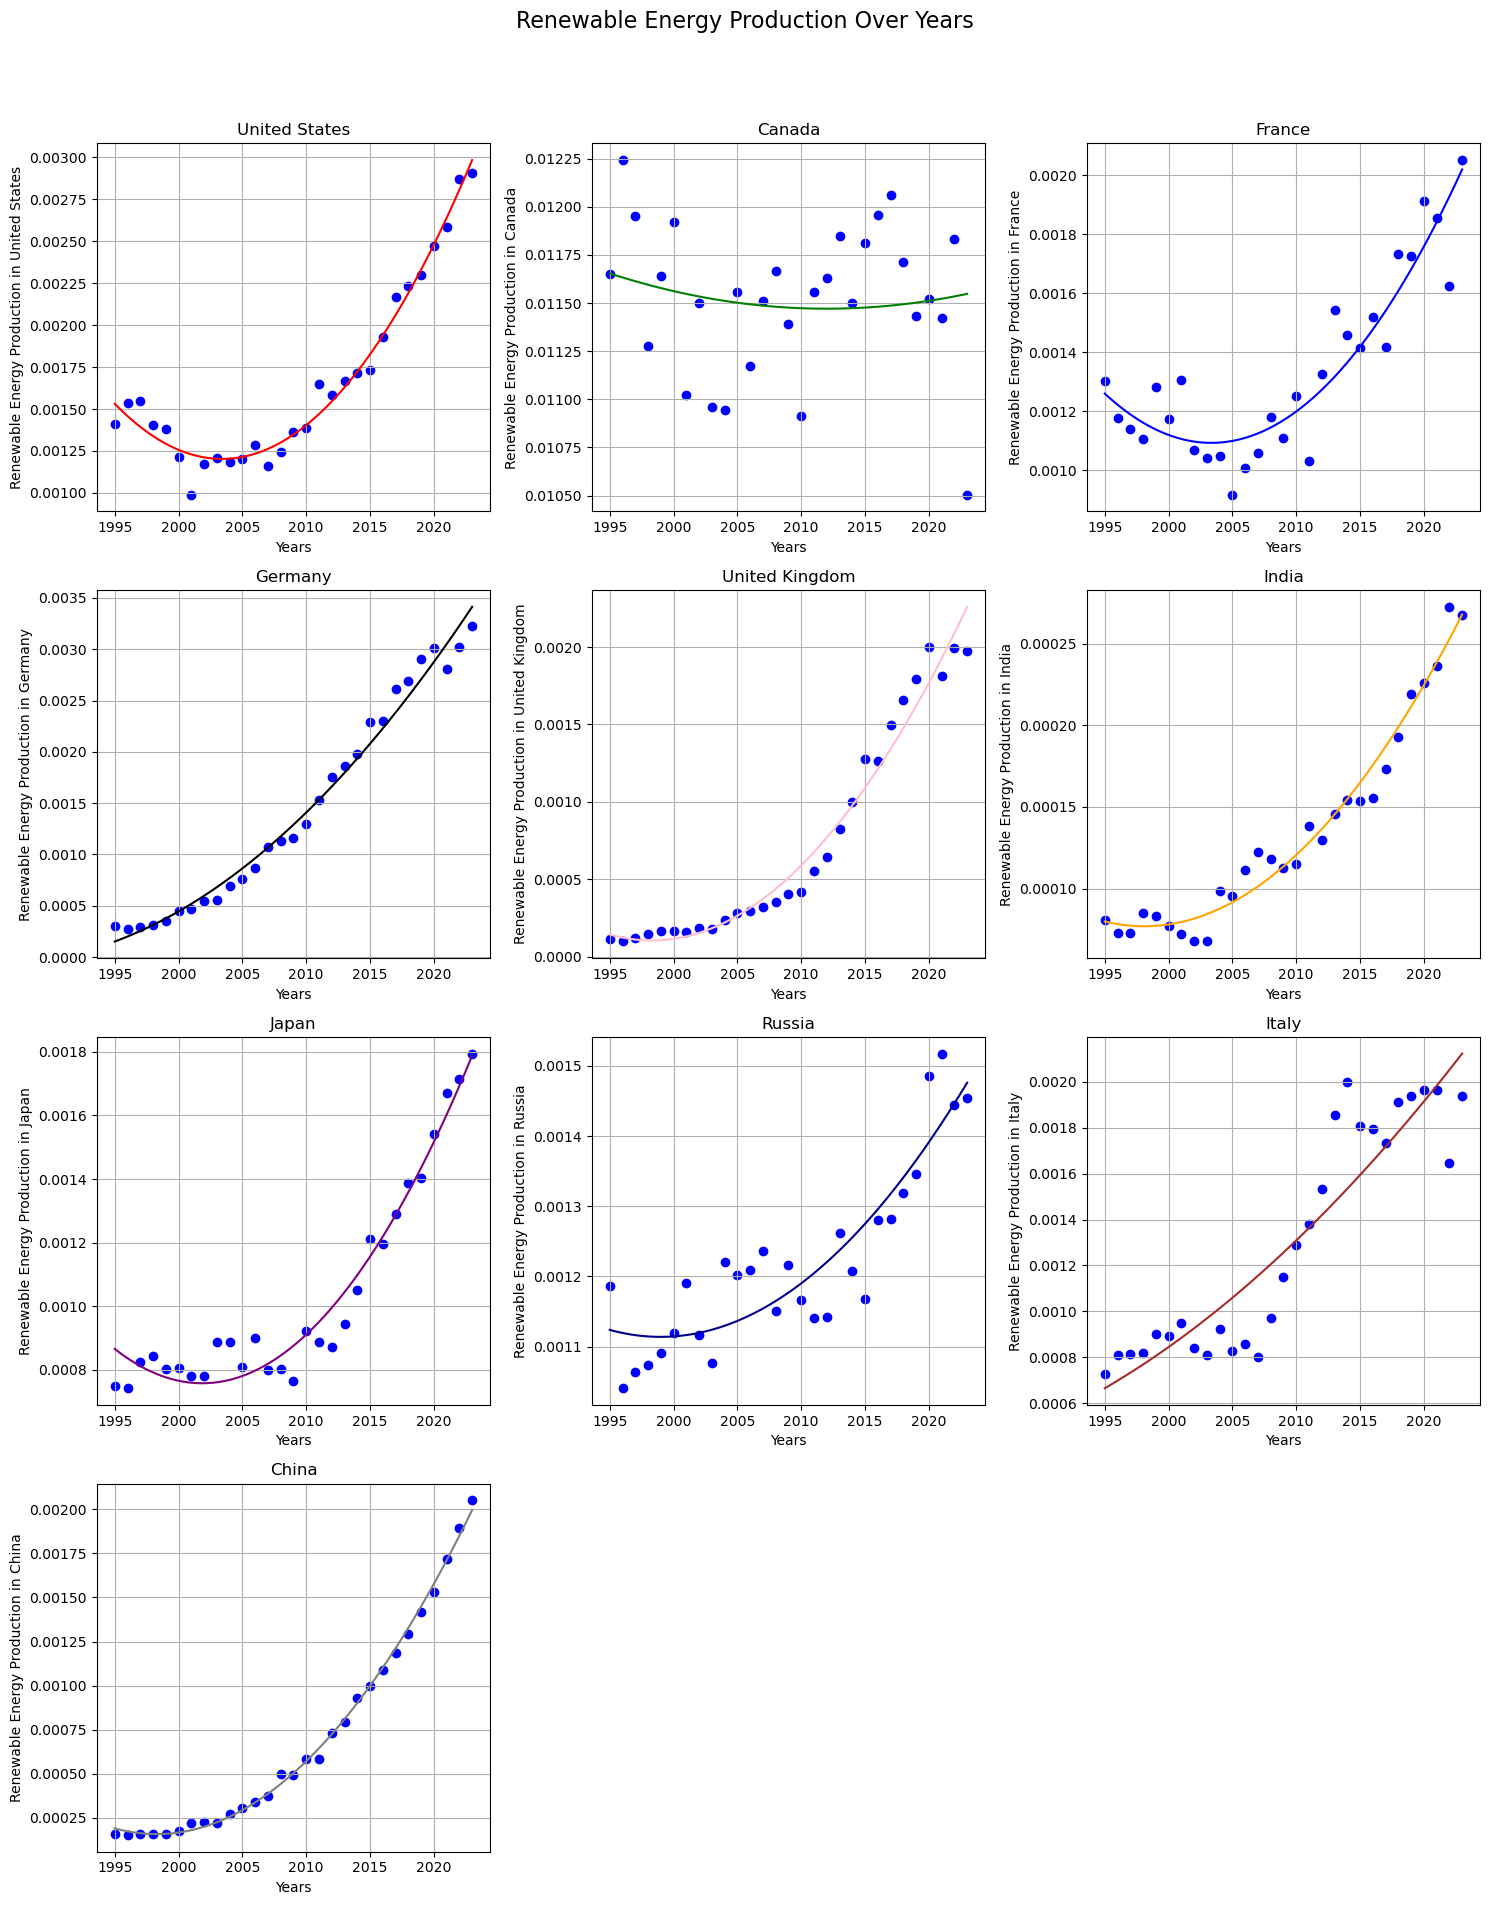

In [687]:
# Now plot the Renewable Energy Production Per-Capita of each country
population.head()
num_cols = 3
num_rows = (len(df.columns) - 1 + num_cols - 1) // num_cols  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

x = df["Years"]
colors = ["red", "green", "blue", "black", "pink", "orange", "purple", "darkblue", "brown", "gray"]
counter = 0
x_data = df['Years'].values.reshape(-1, 1)
x_data = x_data
degree = 2
for i, ax in zip(df.columns[1:], axes.flatten()):
    #y_data1 = df[i].values
    y_data = np.divide(np.array(df[i]), np.array(population[i]))
    # Transform the data to include polynomial features
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x_data)
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(x_poly, y_data)
    
    # Generate the fitted polynomial curve
    x_fit = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
    x_poly_fit = poly.transform(x_fit)
    y_fit = model.predict(x_poly_fit)

    # Generate the scatter plot
    ax.scatter(x_data, y_data, label='Original Data', color='blue')
    ax.plot(x_fit, y_fit, label=f'Fitted Polynomial Curve (degree {degree})', color=colors[counter])
    ax.set_title(i)
    counter += 1

    # Set x-ticks to include only every 10 years
    xticks = list(range(1995, 2025, 5))

    ax.set_xticks(xticks)
    ax.set_xlabel("Years")
    ax.set_ylabel("Renewable Energy Production in " + i)
    ax.grid(True)

# Remove empty subplots
for j in range(counter, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Add overall labels and title
fig.suptitle('Renewable Energy Production Over Years', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

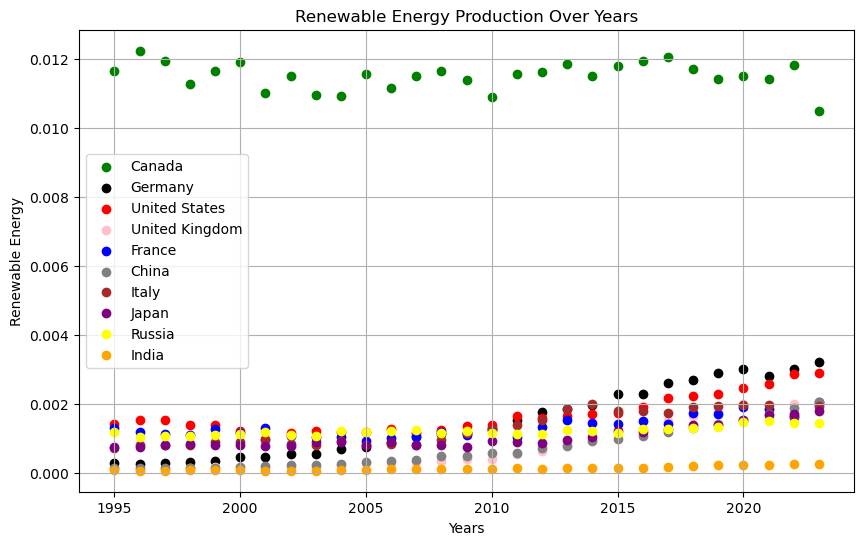

In [898]:
# Plot the Renewable Energy Production Per-Capita of each country on the same axis as a scatterplot

x = df["Years"]
counter = 0
countries = ["Canada", "Germany", "United States", "United Kingdom", "France", "China", "Italy", "Japan", "Russia", "India"]

colors = ["green", "black", "red", "pink", "blue", "gray", "brown", "purple", "yellow", "orange"]
plt.figure(figsize=(10, 6))

for i in countries:
    y = np.divide(np.array(df[i]), np.array(population[i]))

    df2 = df[["Years", i]]

    # Generate the fitted polynomial curve
    x_fit = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
    x_poly_fit = poly.transform(x_fit)
    y_fit = model.predict(x_poly_fit)

    # Generate the scatter plot
    plt.scatter(x, y, label=i, color=colors[counter])
    counter += 1

# Set x-ticks to include only every 10 years
xticks = list(range(1995, 2025, 5))
plt.xticks(xticks)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Renewable Energy')
plt.title('Renewable Energy Production Over Years')
plt.grid(True)
plt.legend()  # Add legend to differentiate between the countries

# Show the plot
plt.show()

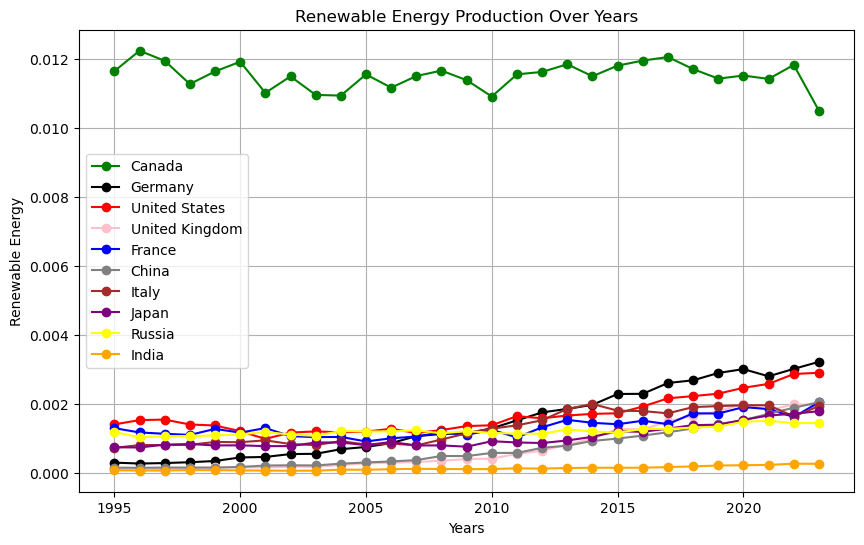

In [842]:
# Plot the Renewable Energy Production Per-Capita of each country on the same axis while connecting the points

x = df["Years"]
counter = 0
countries = ["Canada", "Germany", "United States", "United Kingdom", "France", "China", "Italy", "Japan", "Russia", "India"]
colors = ["green", "black", "red", "pink", "blue", "gray", "brown", "purple", "yellow", "orange"]
plt.figure(figsize=(10, 6))

for i in countries:
    y = np.divide(np.array(df[i]), np.array(population[i]))

    df2 = df[["Years", i]]

    # Generate the fitted polynomial curve
    x_fit = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
    x_poly_fit = poly.transform(x_fit)
    y_fit = model.predict(x_poly_fit)

    # Generate the scatter plot
    #plt.scatter(x, y, label=i, color=colors[counter])
    plt.plot(x, y, '-o', label=i, color=colors[counter])
    counter += 1

# Set x-ticks to include only every 10 years
xticks = list(range(1995, 2025, 5))
plt.xticks(xticks)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Renewable Energy')
plt.title('Renewable Energy Production Over Years')
plt.grid(True)
plt.legend()  # Add legend to differentiate between the countries

# Show the plot
plt.show()

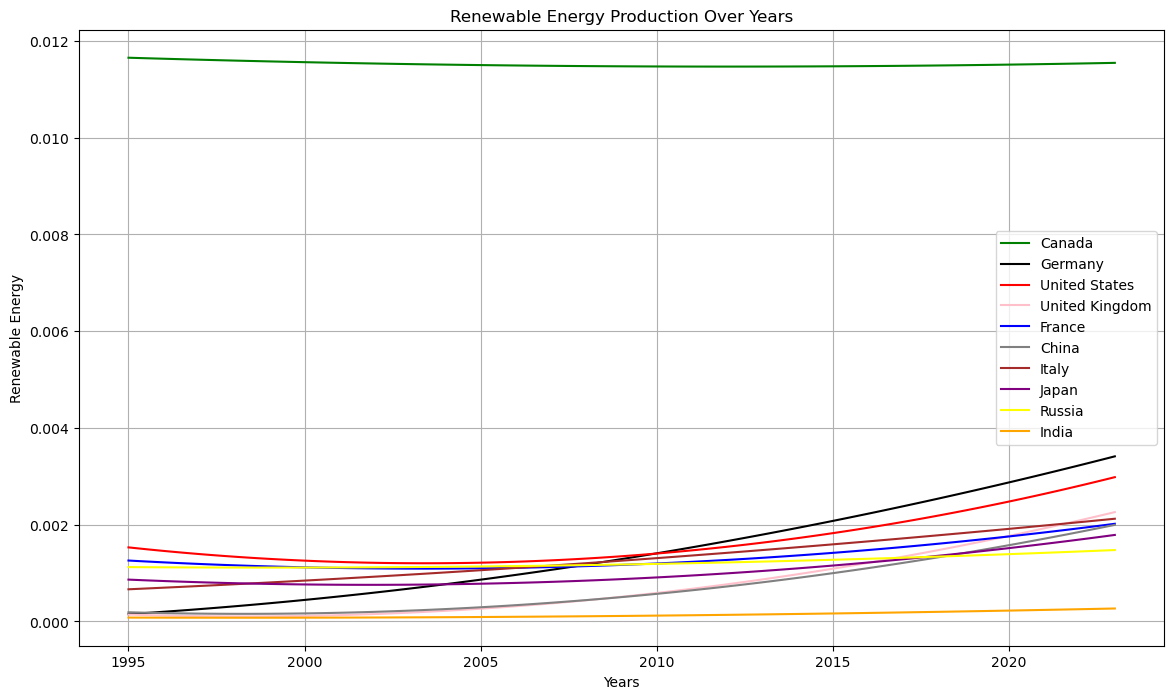

In [886]:
# Plot the Renewable Energy Production Per-Capita of each country on the same axis using polynomail regression with degree 2

x_data = df["Years"].values.reshape(-1, 1)
counter = 0
countries = ["Canada", "Germany", "United States", "United Kingdom", "France", "China", "Italy", "Japan", "Russia", "India"]
colors = ["green", "black", "red", "pink", "blue", "gray", "brown", "purple", "yellow", "orange"]
plt.figure(figsize=(14, 8))
predictions_2030 = []

for i in countries:
    y_data = np.divide(np.array(df[i]), np.array(population[i]))
    df2 = df[["Years", i]]


    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_data)
    model = LinearRegression()
    model.fit(x_poly, y_data)

    # Generate the fitted polynomial curve for the current country
    x_fit = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
    x_poly_fit = poly.transform(x_fit)
    y_fit = model.predict(x_poly_fit)

    # Generate the scatter plot
    #plt.scatter(x, y, label=i, color=colors[counter])
    plt.plot(x_fit, y_fit, color=colors[counter], label=i)
    counter += 1

    # Predict 2030
    year_2030 = np.array([[2050]])
    year_2030_poly = poly.transform(year_2030)
    pred_2030 = model.predict(year_2030_poly)
    predictions_2030.append(pred_2030[0])

# Set x-ticks to include only every 10 years
xticks = list(range(1995, 2025, 5))
plt.xticks(xticks)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Renewable Energy')
plt.title('Renewable Energy Production Over Years')
plt.grid(True)
plt.legend()  # Add legend to differentiate between the countries

# Show the plot
plt.show()

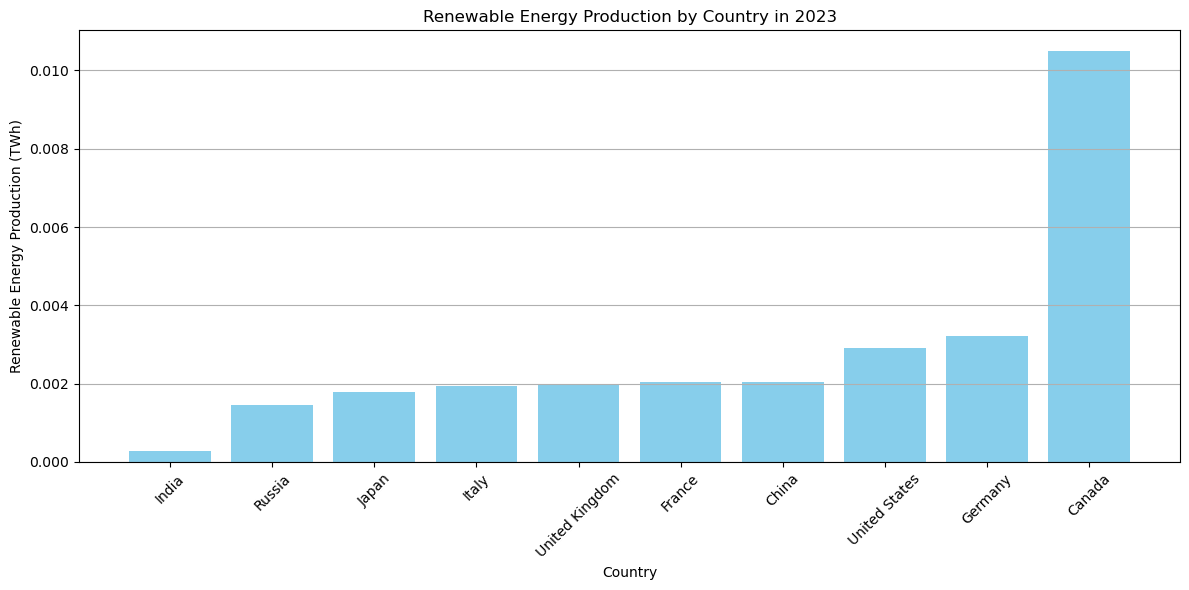

In [888]:
# Plot the renewable energy production as a bar graph

# Filter the data for the year 2023
data_2023 = df[df["Years"] == 2023]

# Extract the countries and their renewable energy production for 2023
countries = data_2023.columns[1:]  # Get all columns except "Years"
data_2023 = df[df["Years"] == 2023]
population_2023 = population[population["Year"] == 2023]
renewable_energy = []
for i in df.columns[1:]:
    x = int(data_2023[i].iloc[0]) / int(population_2023[i].iloc[0])
    renewable_energy.append(x)

renewable_energy, countries = zip(*sorted(zip(renewable_energy, countries)))


# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(countries, renewable_energy, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Renewable Energy Production (TWh)')
plt.title('Renewable Energy Production by Country in 2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the bar graph
plt.tight_layout()
plt.show()

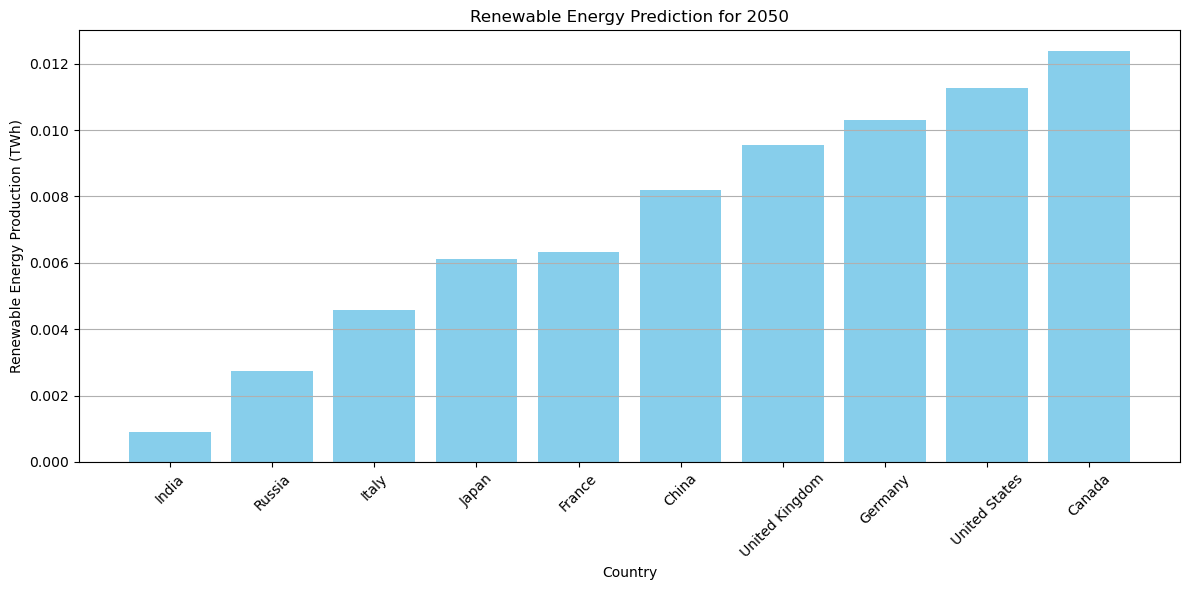

In [892]:
countries = ["Canada", "Germany", "United States", "United Kingdom", "France", "China", "Italy", "Japan", "Russia", "India"]

pred, countries = zip(*sorted(zip(predictions_2030, countries)))

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(countries, pred, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Renewable Energy Production (TWh)')
plt.title('Renewable Energy Prediction for 2050')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the bar graph
plt.tight_layout()
plt.show()